In [2]:
import pandas as pd
from binance.client import Client
import ta
import matplotlib.pyplot as plt
import numpy as np
import mplfinance as mpf

In [3]:
api_key = 'iyJXPaZztWrimkH6V57RGvStFgYQWRaaMdaYBQHHIEv0mMY1huCmrzTbXkaBjLFh'
api_secret = 'hmrus7zI9PW2EXqsDVovoS2cEFRVsxeETGgBf4XJInOLFcmIXKNL23alGRNRbXKI'
client = Client(api_key, api_secret)

In [10]:
symbol = 'ETHUSDT'
interval = Client.KLINE_INTERVAL_1HOUR


In [11]:
num_points = 200


In [13]:
klines = client.futures_klines(symbol=symbol, interval=interval, limit=num_points)


In [14]:
timestamps = [kline[0] for kline in klines]
closing_prices = [float(kline[4]) for kline in klines]

In [15]:
df = pd.DataFrame({'timestamp': timestamps, 'closing_price': closing_prices})

# Convert timestamps to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# Calculate the short-term (e.g., 9-day) and long-term (e.g., 21-day) SMAs
short_window = 9
long_window = 21
df['short_ma'] = df['closing_price'].rolling(window=short_window).mean()
df['long_ma'] = df['closing_price'].rolling(window=long_window).mean()

# Generate trading signals based on crossovers
df['signal'] = 0  # 0 represents no signal
df['signal'][short_window:] = np.where(df['short_ma'][short_window:] > df['long_ma'][short_window:], 1, 0)


C:\Users\admin\AppData\Local\Temp\ipykernel_14116\816495955.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['signal'][short_window:] = np.where(df['short_ma'][short_window:] > df['long_ma'][short_window:], 1, 0)


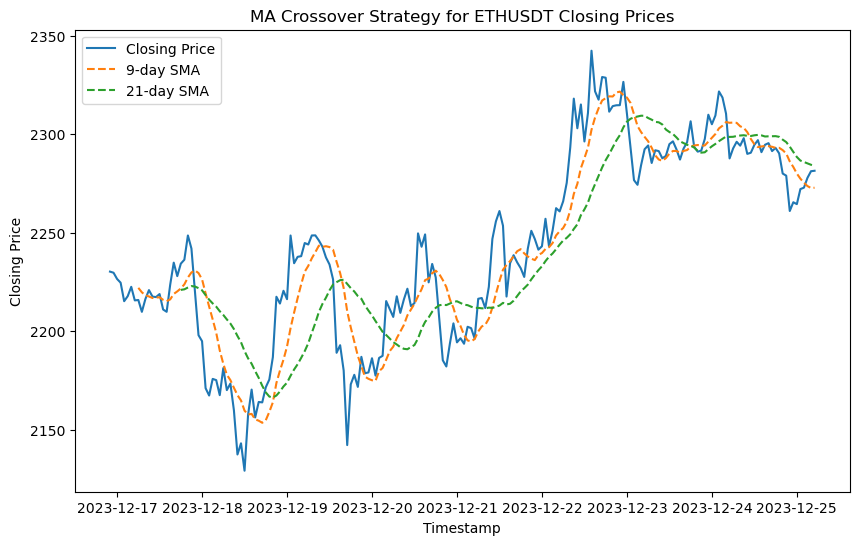

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['closing_price'], label='Closing Price')
plt.plot(df['timestamp'], df['short_ma'], label=f'{short_window}-day SMA', linestyle='dashed')
plt.plot(df['timestamp'], df['long_ma'], label=f'{long_window}-day SMA', linestyle='dashed')
# plt.plot(df['timestamp'], df['signal'] * df['closing_price'], '^', markersize=10, color='g', label='Buy Signal')
plt.title(f'MA Crossover Strategy for {symbol} Closing Prices')
plt.xlabel('Timestamp')
plt.ylabel('Closing Price')
plt.legend()
plt.show()